In [124]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

from skimage.segmentation import clear_border


In [2]:
print(f'OpenCv2 {cv2.__version__}')
print(f'Tesseract {pytesseract.__version__}')


OpenCv2 4.6.0
Tesseract 0.3.10


In [14]:
base_images = r'D:\Databases\Images'


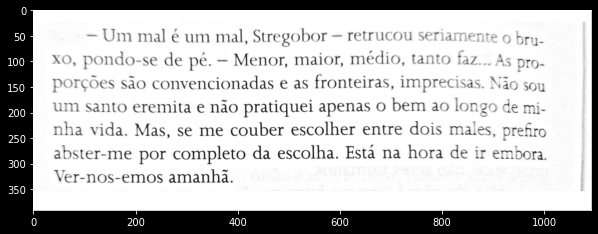

In [69]:
img = cv2.imread(base_images + r'\trecho_livro.png')
imagem = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
plt.figure(figsize=(10, 6))
plt.imshow(imagem)


In [9]:
texto = pytesseract.image_to_string(img, lang='por', config="--psm 6")
print(texto)


— Um mal é um mal, Stregobor — retrucou seriamente o bry-
xo, pondo-se de pé. — Menor, maior, médio, tanto faz... As pro-
porções são convencionadas e as fronteiras, imprecisas. Não sou
um santo eremita e não pratiquei apenas o bem ao longo de mi-
nha vida. Mas, se me couber escolher entre dois males, prefiro
abster-me por completo da escolha. Está na hora de ir embora. |
Ver-nos-emos amanhã. |



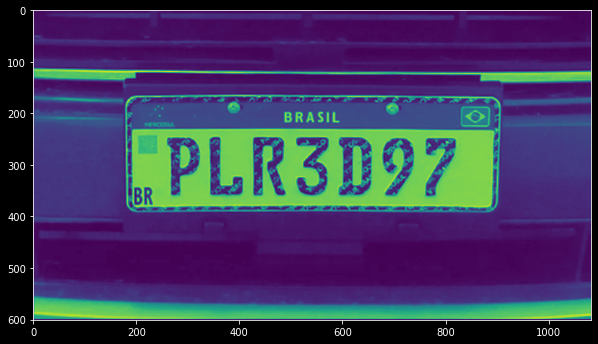

In [74]:
img = cv2.imread(base_images + r"\placa_carro1.png")
imagem = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 6))
plt.imshow(imagem)


In [46]:
texto = pytesseract.image_to_string(imagem, lang='por')
print(texto)


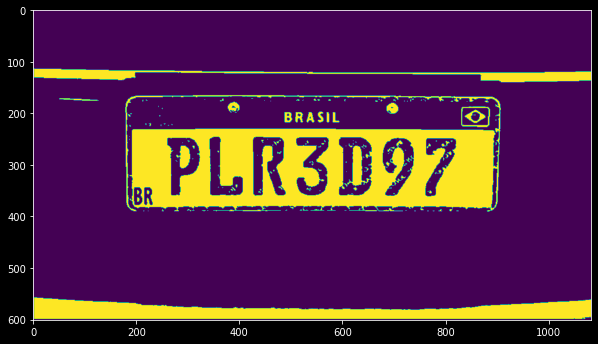

In [67]:
limiar = 127
valor, lim_simples = cv2.threshold(imagem, limiar, 255, cv2.THRESH_BINARY)
plt.figure(figsize=(10, 6))
plt.imshow(lim_simples)


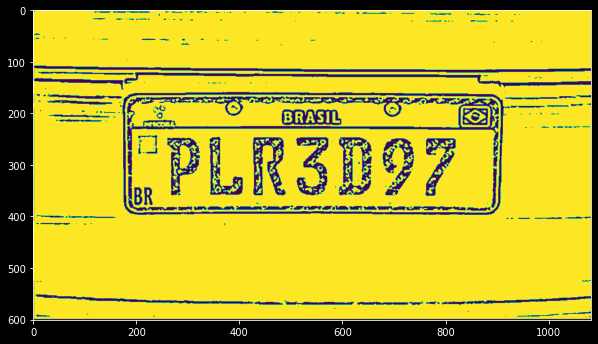

In [66]:
lim_adapt = cv2.adaptiveThreshold(
    imagem, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 8)
plt.figure(figsize=(10, 6))
plt.imshow(lim_adapt)


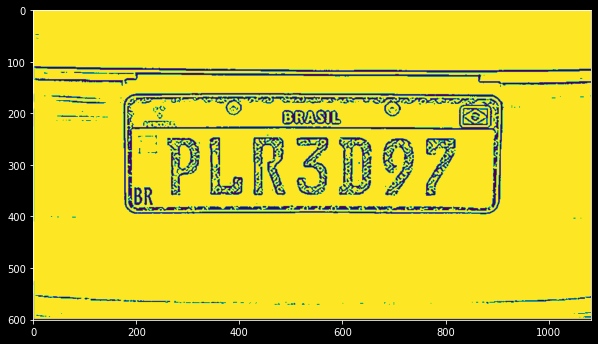

In [65]:
lim_adapt = cv2.adaptiveThreshold(
    imagem, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 8)
plt.figure(figsize=(10, 6))
plt.imshow(lim_adapt)


In [34]:
display(imagem)
print(type(imagem))


array([[ 14,  14,   2, ...,   5,   5,   5],
       [ 14,  14,   2, ...,   5,   5,   5],
       [ 14,  14,   3, ...,   5,   5,   5],
       ...,
       [ 14,  14, 144, ..., 122, 121, 120],
       [ 14,  14,  14, ...,  14,  14,  14],
       [ 14,  14,  14, ...,  14,  14,  14]], dtype=uint8)

<class 'numpy.ndarray'>


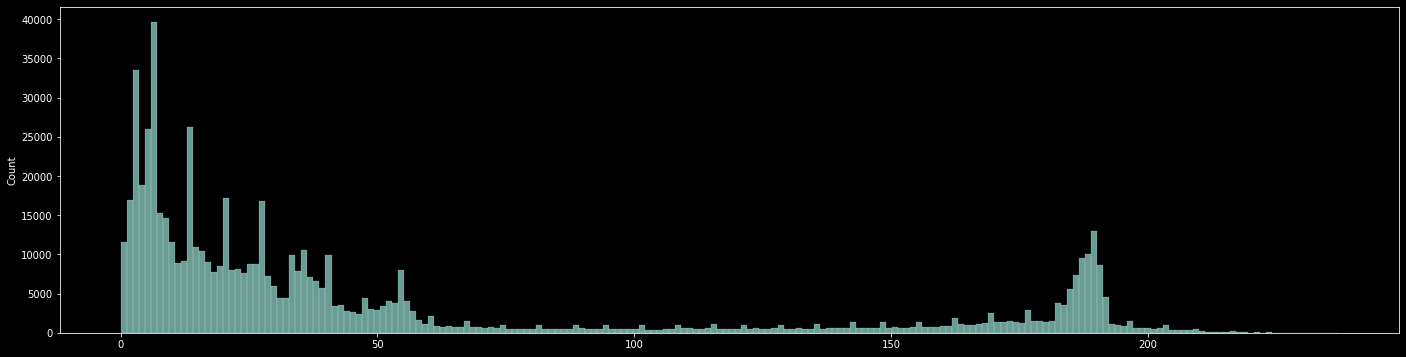

In [38]:
ax = sns.histplot(imagem.flatten())
ax.figure.set_size_inches(24, 6)


Limiar: 96.0


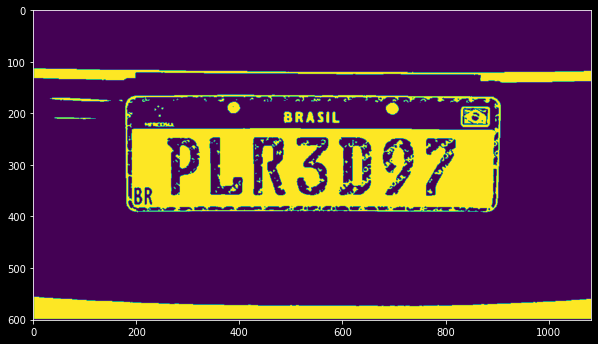

In [64]:
valor, lim_otsu = cv2.threshold(
    imagem, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.figure(figsize=(10, 6))
plt.imshow(lim_otsu)
print(f'Limiar: {valor}')


In [45]:
texto = pytesseract.image_to_string(lim_otsu, lang='por')
print(texto)


In [47]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))


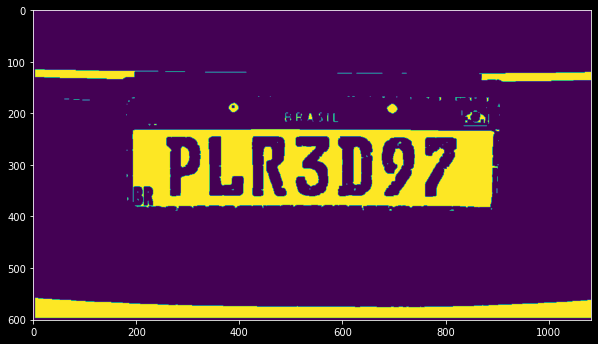

In [63]:
erosao = cv2.erode(lim_otsu, kernel)
plt.figure(figsize=(10, 6))
plt.imshow(erosao)


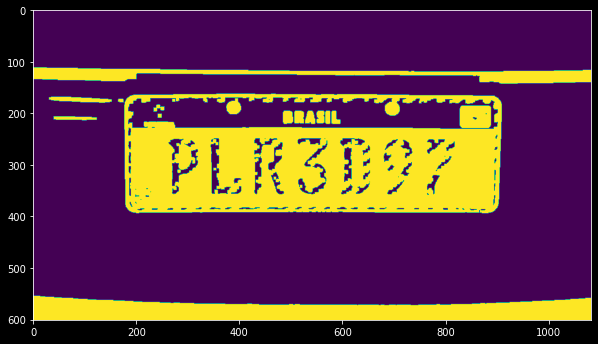

In [62]:
dilatacao = cv2.dilate(lim_otsu, kernel)
plt.figure(figsize=(10, 6))
plt.imshow(dilatacao)


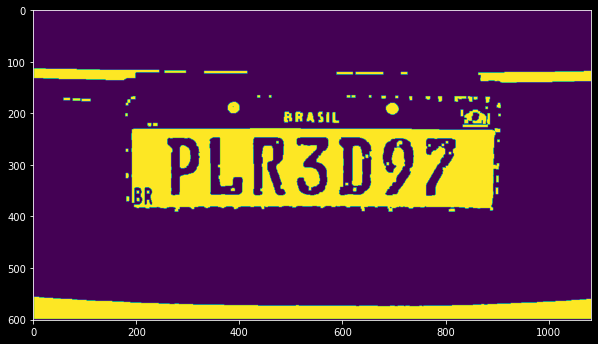

In [61]:
abertura = cv2.morphologyEx(lim_otsu, cv2.MORPH_OPEN, kernel)
plt.figure(figsize=(10, 6))
plt.imshow(abertura)


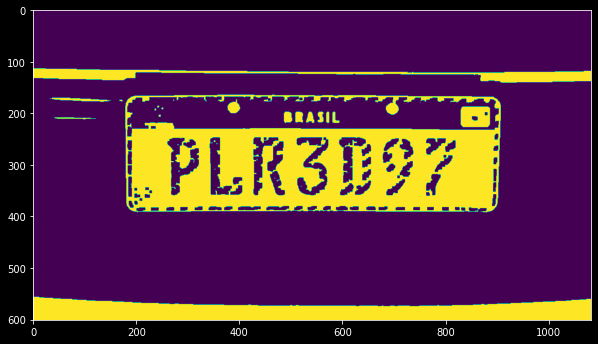

In [60]:
fechamento = cv2.morphologyEx(lim_otsu, cv2.MORPH_CLOSE, kernel)
plt.figure(figsize=(10, 6))
plt.imshow(fechamento)


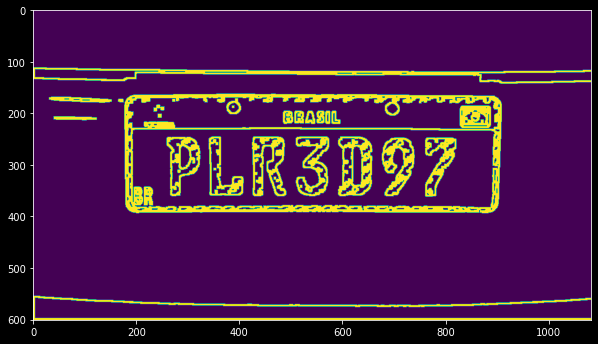

In [59]:
gradiente = cv2.morphologyEx(lim_otsu, cv2.MORPH_GRADIENT, kernel)
plt.figure(figsize=(10, 6))
plt.imshow(gradiente)


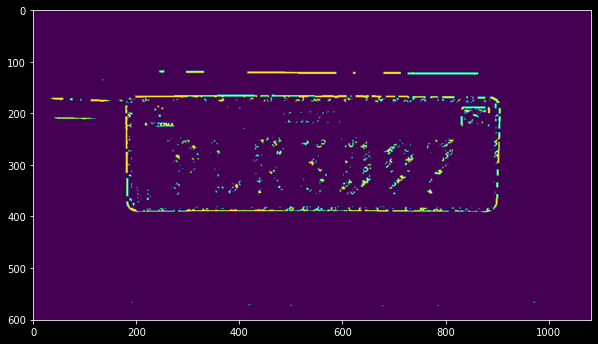

In [70]:
cartola = cv2.morphologyEx(lim_otsu, cv2.MORPH_TOPHAT, kernel)
plt.figure(figsize=(10, 6))
plt.imshow(cartola)


In [71]:
kernel_retangular = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 13))


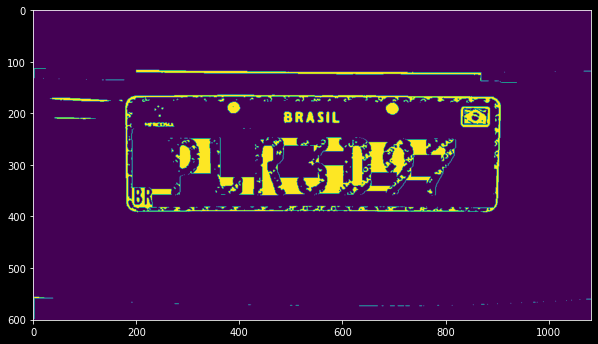

In [72]:
cartola = cv2.morphologyEx(lim_otsu, cv2.MORPH_TOPHAT, kernel_retangular)
plt.figure(figsize=(10, 6))
plt.imshow(cartola)


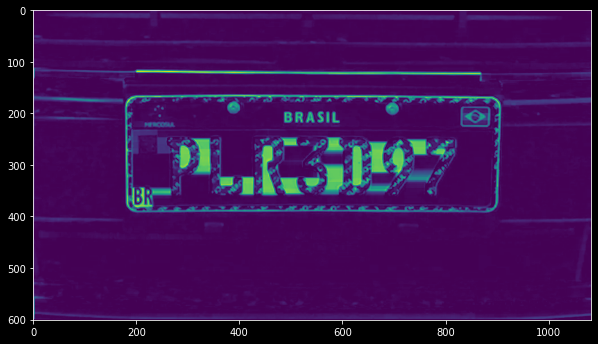

In [75]:
cartola = cv2.morphologyEx(imagem, cv2.MORPH_TOPHAT, kernel_retangular)
plt.figure(figsize=(10, 6))
plt.imshow(cartola)


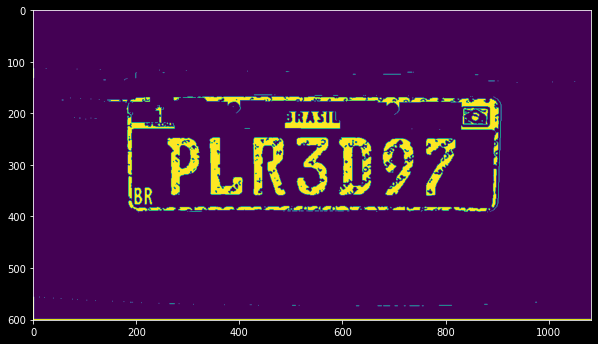

In [76]:
chapeu_preto = cv2.morphologyEx(
    lim_otsu, cv2.MORPH_BLACKHAT, kernel_retangular)
plt.figure(figsize=(10, 6))
plt.imshow(chapeu_preto)


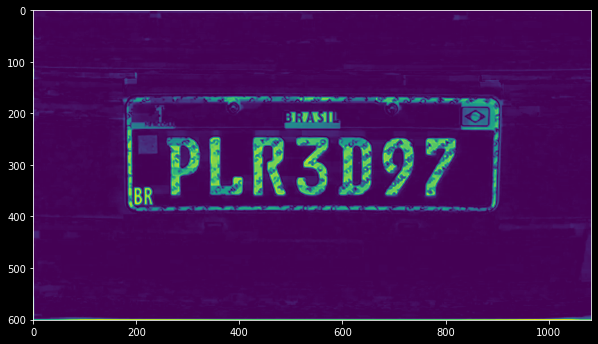

In [77]:
chapeu_preto = cv2.morphologyEx(imagem, cv2.MORPH_BLACKHAT, kernel_retangular)
plt.figure(figsize=(10, 6))
plt.imshow(chapeu_preto)


In [78]:
texto = pytesseract.image_to_string(erosao, lang='por', config="--psm 6")
print(texto)


, PLRÓD97 |
R .S %



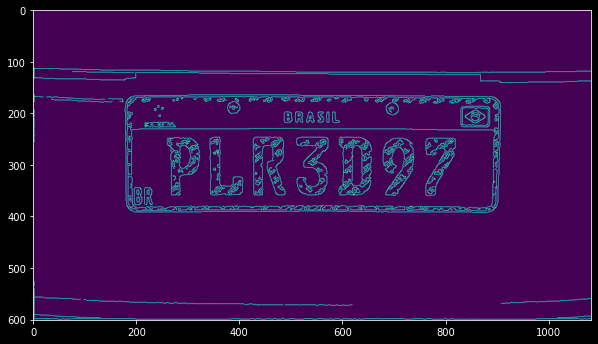

In [79]:
bordas = cv2.Canny(imagem, 100, 200)
plt.figure(figsize=(10, 6))
plt.imshow(bordas)


In [80]:
contornos, hierarquia = cv2.findContours(
    bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


In [82]:
for contorno in contornos:
    epsilon = 0.02 * cv2.arcLength(contorno, True)
    aproximacao = cv2.approxPolyDP(contorno, epsilon, True)
    if cv2.isContourConvex(aproximacao) and len(aproximacao) == 4:
        localizacao = aproximacao
        break


In [83]:
localizacao


array([[[180, 178]],

       [[196, 391]],

       [[901, 375]],

       [[894, 168]]], dtype=int32)

In [84]:
x, y, w, h = cv2.boundingRect(localizacao)


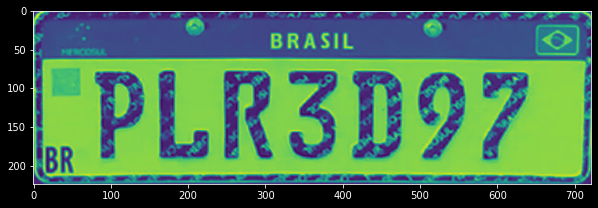

In [87]:
placa = imagem[y:y+h, x:x+w]
plt.figure(figsize=(10, 6))
plt.imshow(placa)


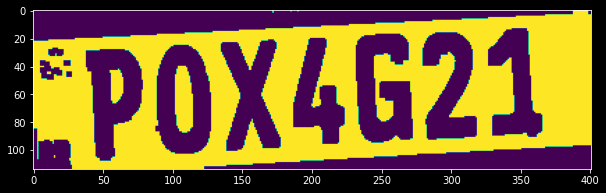

In [113]:
valor, lim_otsu = cv2.threshold(
    placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
erosao = cv2.erode(lim_otsu, cv2.getStructuringElement(cv2.MORPH_RECT, (4, 4)))
plt.figure(figsize=(10, 6))
plt.imshow(erosao)


In [90]:
texto = pytesseract.image_to_string(erosao, lang='por', config="--psm 6")
print(texto)


L PLR3D97



In [93]:
regex = re.compile(r'\w{3}\d{1}\w{1}\d{2}')
texto_extraido = regex.search(texto)
print(f'Texto Extraído {texto_extraido.group(0)}')


Texto Extraído PLR3D97


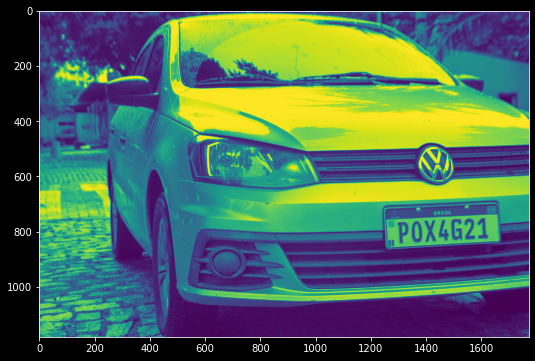

In [96]:
imagem = cv2.imread(base_images + r'\placa_carro2.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 6))
plt.imshow(imagem)


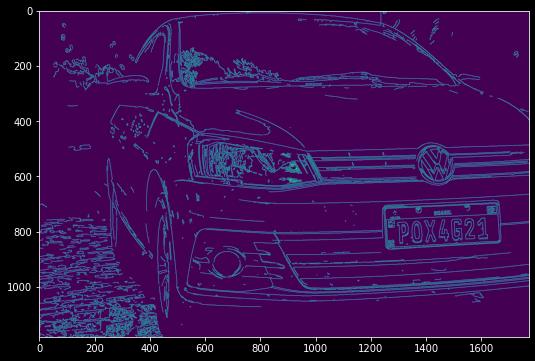

In [97]:
bordas = cv2.Canny(imagem, 100, 200)
plt.figure(figsize=(10, 6))
plt.imshow(bordas)


In [98]:
contornos, hierarquia = cv2.findContours(
    bordas, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contornos = sorted(contornos, key=cv2.contourArea, reverse=True)[:10]


In [99]:
for contorno in contornos:
    epsilon = 0.02 * cv2.arcLength(contorno, True)
    aproximacao = cv2.approxPolyDP(contorno, epsilon, True)
    if cv2.isContourConvex(aproximacao) and len(aproximacao) == 4:
        localizacao = aproximacao
        break

In [100]:
localizacao

array([[[1659,  737]],

       [[1656,  835]],

       [[1260,  850]],

       [[1259,  756]]], dtype=int32)

In [101]:
x, y, w, h = cv2.boundingRect(localizacao)

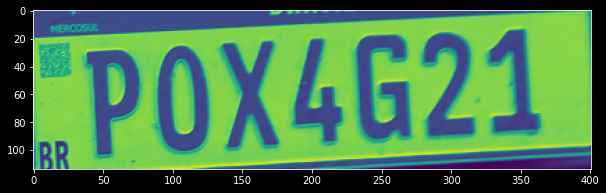

In [102]:
placa = imagem[y:y+h, x:x+w]
plt.figure(figsize=(10, 6))
plt.imshow(placa)

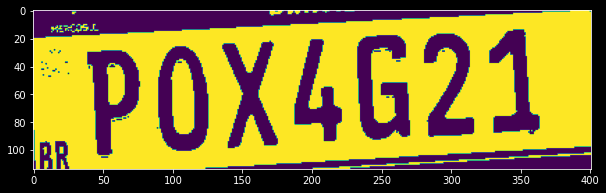

In [106]:
valor, lim_otsu = cv2.threshold(
    placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.figure(figsize=(10, 6))
plt.imshow(lim_otsu)

In [105]:
texto = pytesseract.image_to_string(lim_otsu, lang='por', config="--psm 6")
regex = re.compile(r'\w{3}\d{1}\w{1}\d{2}')
texto_extraido = regex.search(texto)
print(f'Texto Extraído {texto_extraido.group(0)}')

Texto Extraído POX4G21


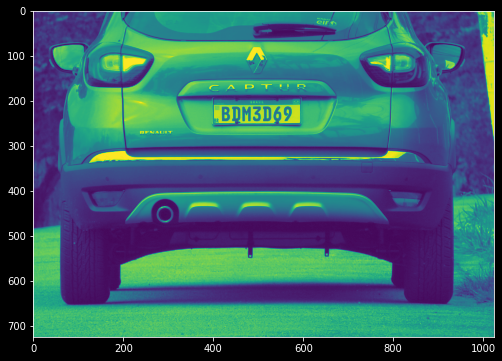

In [110]:
imagem = cv2.imread(base_images + r'\placa_carro3.jpg')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(10, 6))
plt.imshow(imagem)

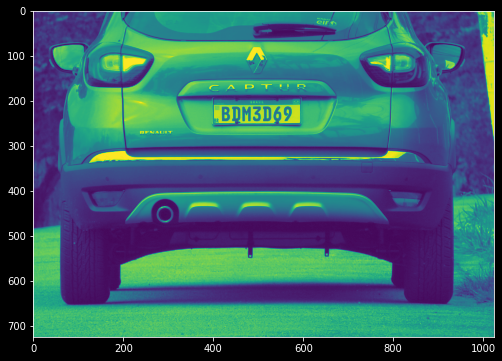

In [111]:
kernel_retangular = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 13))
chapeu_preto = cv2.morphologyEx(imagem, cv2.MORPH_BLACKHAT, kernel_retangular)
plt.figure(figsize=(10, 6))
plt.imshow(imagem)

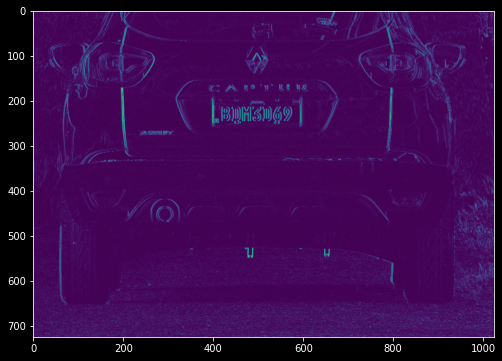

In [118]:
sobel_x = cv2.Sobel(chapeu_preto, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=1)
sobel_x = np.absolute(sobel_x)
sobel_x = sobel_x.astype('uint8')
plt.figure(figsize=(10, 6))
plt.imshow(sobel_x)


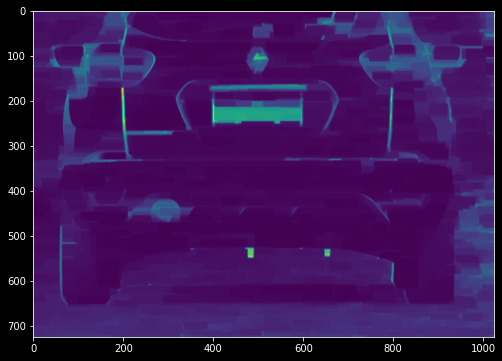

In [119]:
sobel_x = cv2.GaussianBlur(sobel_x, (5, 5), 0)
sobel_x = cv2.morphologyEx(sobel_x, cv2.MORPH_CLOSE, kernel_retangular)
plt.figure(figsize=(10, 6))
plt.imshow(sobel_x)

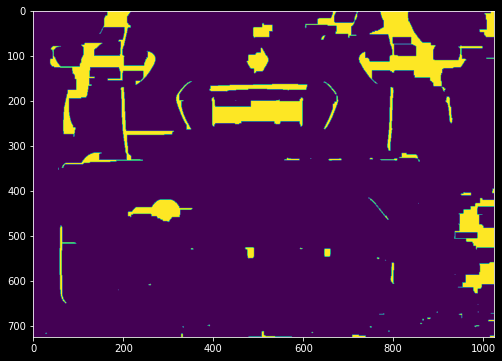

In [120]:
valor, limiarizacao = cv2.threshold(sobel_x, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.figure(figsize=(10, 6))
plt.imshow(limiarizacao)

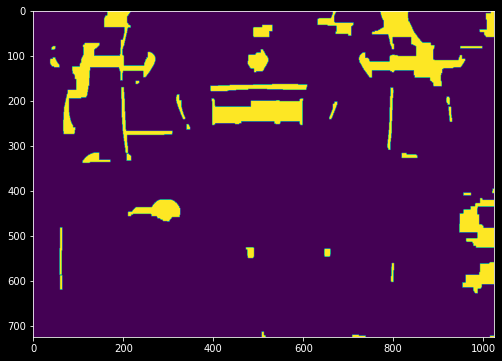

In [121]:
kernel_quadrado = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
limiarizacao = cv2.erode(limiarizacao, kernel_quadrado, iterations=2)
limiarizacao = cv2.dilate(limiarizacao, kernel_quadrado, iterations=2)
plt.figure(figsize=(10, 6))
plt.imshow(limiarizacao)

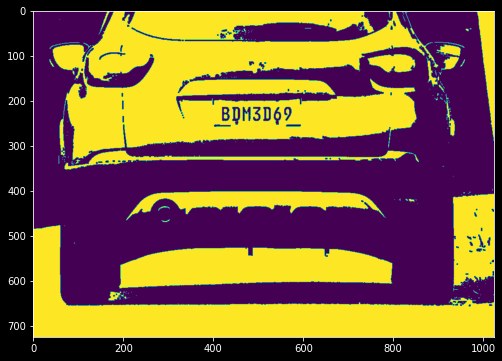

In [122]:
fechamento = cv2.morphologyEx(imagem, cv2.MORPH_CLOSE, kernel_quadrado)
valor, mascara = cv2.threshold(fechamento, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
plt.figure(figsize=(10, 6))
plt.imshow(mascara)

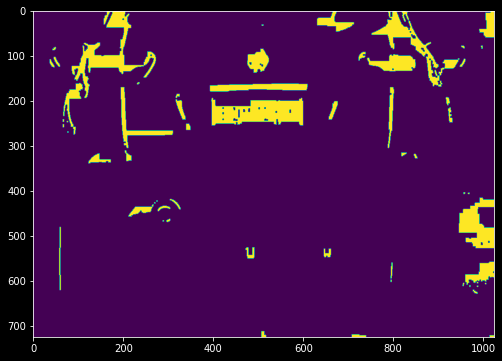

In [123]:
limiarizacao = cv2.bitwise_and(limiarizacao, limiarizacao, mask=mascara)
limiarizacao = cv2.dilate(limiarizacao, kernel_quadrado, iterations=2)
limiarizacao = cv2.erode(limiarizacao, kernel_quadrado)
plt.figure(figsize=(10, 6))
plt.imshow(limiarizacao)

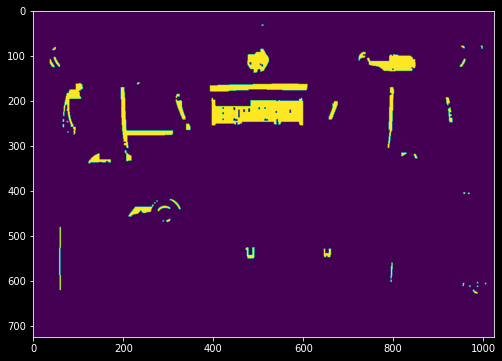

In [125]:
limiarizacao = clear_border(limiarizacao)
plt.figure(figsize=(10, 6))
plt.imshow(limiarizacao)

In [126]:
contornos, hierarquia = cv2.findContours(
    limiarizacao, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contornos = sorted(contornos, key=cv2.contourArea, reverse=True)[:10]


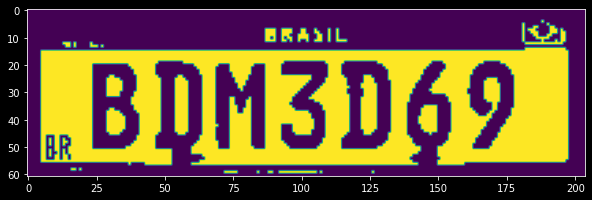

In [127]:
for contorno in contornos:
    x,y,w,h = cv2.boundingRect(contorno)
    proporcao = float(w) / h
    if proporcao >= 3 and proporcao <= 3.5:
      placa = imagem[y:y+h, x:x+w]
      valor, regiao_interesse = cv2.threshold(placa, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
      regiao_interesse = clear_border(regiao_interesse)
      
      plt.figure(figsize=(10, 6))
      plt.imshow(regiao_interesse)

      


In [128]:
texto = pytesseract.image_to_string(regiao_interesse, lang='por', config="--psm 6")
regex = re.compile(r'\w{3}\d{1}\w{1}\d{2}')
texto_extraido = regex.search(texto)
print(f'Texto Extraído {texto_extraido.group(0)}')

Texto Extraído BDM3D69
